In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns

np.random.seed(123)
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30
x, y = np.random.multivariate_normal(mean, cov, n).T

# T-test
pg.ttest(x, y)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-3.400706,58,two-sided,0.001222,"[-1.68, -0.43]",0.878059,26.155,0.916807


In [2]:
# Factory of Indicators

def ind_volumetry(dataframe):
    #Índice de volumetria do edificado 
    total_edificios = (dataframe.N_EDIFICIOS_1OU2_PISOS)+(dataframe.N_EDIFICIOS_3OU4_PISOS)+(dataframe.N_EDIFICIOS_5OU_MAIS_PISOS)
    volumetria = ((dataframe.N_EDIFICIOS_1OU2_PISOS*1.5)+(dataframe.N_EDIFICIOS_3OU4_PISOS*3.5)+(dataframe.N_EDIFICIOS_5OU_MAIS_PISOS*7))
    dataframe["IVolumetria"] = volumetria/total_edificios
    return dataframe

def ind_vacant_accomodation(dataframe):
    #alojamentos vagos
    dataframe["vagos_perc"]=dataframe['N_ALOJAMENTOS_VAGOS']/dataframe['N_ALOJAMENTOS']
    return dataframe

def ind_building_year(dataframe):
    #indicador de ano médio do edificado
    total_edificios = (dataframe.N_EDIFICIOS_CONSTR_ANTES_1919)+(dataframe.N_EDIFICIOS_CONSTR_1919A1945)+(dataframe.N_EDIFICIOS_CONSTR_1946A1960)+(dataframe.N_EDIFICIOS_CONSTR_1961A1970)+(dataframe.N_EDIFICIOS_CONSTR_1971A1980)+(dataframe.N_EDIFICIOS_CONSTR_1981A1990)+(dataframe.N_EDIFICIOS_CONSTR_1991A1995)+(dataframe.N_EDIFICIOS_CONSTR_1996A2000)+(dataframe.N_EDIFICIOS_CONSTR_2001A2005)+(dataframe.N_EDIFICIOS_CONSTR_2006A2011)
    dataframe['IMédia_edif2'] = ((2011-1910)*dataframe.N_EDIFICIOS_CONSTR_ANTES_1919)+((2011-1932)*dataframe.N_EDIFICIOS_CONSTR_1919A1945)+((2011-1953)*dataframe.N_EDIFICIOS_CONSTR_1946A1960)+((2011-1965.5)*dataframe.N_EDIFICIOS_CONSTR_1961A1970)+((2011-1975.5)*dataframe.N_EDIFICIOS_CONSTR_1971A1980)+((2011-1985.5)*dataframe.N_EDIFICIOS_CONSTR_1981A1990)+((2011-1993)*dataframe.N_EDIFICIOS_CONSTR_1991A1995)+((2011-1998)*dataframe.N_EDIFICIOS_CONSTR_1996A2000)+((2011-2003)*dataframe.N_EDIFICIOS_CONSTR_2001A2005)+((2011-2008.5)*dataframe.N_EDIFICIOS_CONSTR_2006A2011)/total_edificios
    return dataframe

def ind_habitual_residence(dataframe):
    """
        alojamento de residencia habitual (principal)
    """
    dataframe["aloj_habitual_perc"]= dataframe["N_ALOJAMENTOS_RES_HABITUAL"]/dataframe["N_ALOJAMENTOS"]
    return dataframe

def ind_proprietary_residence(dataframe):
    """
        alojamento de residencia proprietário
    """
    dataframe["aloj_proprietário_perc"]= dataframe["N_RES_HABITUAL_PROP_OCUP"]/dataframe["N_CLASSICOS_RES_HABITUAL"]
    dataframe["aloj_proprietário_perc"]
    return dataframe
    
def ind_residence_size(dataframe):
    #dimensão média dos alojamentos
    total_edificios = (dataframe.N_RES_HABITUAL_AREA_50)*(dataframe.N_RES_HABITUAL_AREA_50_100)+(dataframe.N_RES_HABITUAL_AREA_100_200)+(dataframe.N_RES_HABITUAL_AREA_200)
    dimensao = (dataframe.N_RES_HABITUAL_AREA_50*25)+(dataframe.N_RES_HABITUAL_AREA_50_100*75)+(dataframe.N_RES_HABITUAL_AREA_100_200*150)+(dataframe.N_RES_HABITUAL_AREA_200*300)
    dataframe["dimensao_aloj"]=dimensao/total_edificios
    return dataframe

def ind_number_residences_per_family(dataframe):
    """
        alojamento por família
    """
    dataframe["aloj_por_familia"]= dataframe["N_ALOJAMENTOS"]/dataframe["N_FAMILIAS_CLASSICAS"]
    return dataframe

def ind_revenue_perc(dataframe):
    """
        pecentagem do arrendamento
    """
    dataframe["arrendamento_perc"]= dataframe["N_RES_HABITUAL_ARREND"]/dataframe["N_ALOJAMENTOS_FAMILIARES"]
    return dataframe

def ind_division_number(dataframe):
    """
        número médio de divisões
    """
    dataframe["divisões_n"]= (dataframe.N_RES_HABITUAL_1_2_DIV*1.5)+(dataframe.N_RES_HABITUAL_3_4_DIV*3.5)
    return dataframe

def ind_old_age(dataframe):
    """
        Indice de envelhecimento = 
        [pop com mais de 65 anos / pop até 20 anos]*100
    """
    dataframe["ind_envelhecimento"]= (dataframe.N_INDIVIDUOS_RESIDENT_65)/(dataframe.N_INDIVIDUOS_RESIDENT_0A4+dataframe.N_INDIVIDUOS_RESIDENT_5A9+dataframe.N_INDIVIDUOS_RESIDENT_10A13+dataframe.N_INDIVIDUOS_RESIDENT_14A19)*100
    return dataframe 

def ind_qualification(dataframe):
    """
        indice de qualificação 
        (número de anos de escolaridade da população)
    """
    total_população=(dataframe.N_IND_RESIDENT_ENSINCOMP_1BAS)+(dataframe.N_IND_RESIDENT_ENSINCOMP_2BAS)+(dataframe.N_IND_RESIDENT_ENSINCOMP_3BAS)+(dataframe.N_IND_RESIDENT_ENSINCOMP_SEC)+(dataframe.N_IND_RESIDENT_ENSINCOMP_POSEC)+(dataframe.N_IND_RESIDENT_ENSINCOMP_SUP)
    anos_escolaridade=(dataframe.N_IND_RESIDENT_ENSINCOMP_1BAS*4)+(dataframe.N_IND_RESIDENT_ENSINCOMP_2BAS*6)+(dataframe.N_IND_RESIDENT_ENSINCOMP_3BAS*9)+(dataframe.N_IND_RESIDENT_ENSINCOMP_SEC*12)+(dataframe.N_IND_RESIDENT_ENSINCOMP_POSEC*12)+(dataframe.N_IND_RESIDENT_ENSINCOMP_SUP*14)
    dataframe["ind_qualificações"]=anos_escolaridade/total_população
    dataframe["ind_qualificações"]
    
    return dataframe

def ind_migration(dataframe):
    """
        Índice de ´migração´
    """
    dataframe["ind_migração"]=dataframe['N_INDIVIDUOS_PRESENT']/dataframe['N_INDIVIDUOS_RESIDENT']*100
    return dataframe

def ind_employment_strutucture(dataframe):
    """
        estrutura do emprego (primário)
    """
    total_emprego=(dataframe.N_IND_RESID_EMPREG_SECT_PRIM)+(dataframe.N_IND_RESID_EMPREG_SECT_SEQ)+(dataframe.N_IND_RESID_EMPREG_SECT_TERC)
    dataframe["primário_perc"]=dataframe.N_IND_RESID_EMPREG_SECT_PRIM/total_emprego
    return dataframe 

def ind_employment_structure_secundary(dataframe):
    """
        estrutura do emprego secundário
    """
    total_emprego=(dataframe.N_IND_RESID_EMPREG_SECT_PRIM)+(dataframe.N_IND_RESID_EMPREG_SECT_SEQ)+(dataframe.N_IND_RESID_EMPREG_SECT_TERC)
    dataframe["secundário_perc"]=dataframe.N_IND_RESID_EMPREG_SECT_SEQ/total_emprego
    return dataframe

def ind_employment_structure_terciary(dataframe):
    
    """
        estrutura do emprego (terciário)
    """
    total_emprego=(dataframe.N_IND_RESID_EMPREG_SECT_PRIM)+(dataframe.N_IND_RESID_EMPREG_SECT_SEQ)+(dataframe.N_IND_RESID_EMPREG_SECT_TERC)
    dataframe["terciário_perc"]=dataframe.N_IND_RESID_EMPREG_SECT_TERC/total_emprego
    return dataframe 

def build_categorical_variable(dataframe, indicator_name, column_name, labels, intervals):
    """
        Build categorial variables for BGRI-PT 2011 Dataframe
        ----
        Params
        dataframe: (dataframe) BGRI dataframe from 2011
        indicator_name: (string) a string to store the classes on the original dataframe
        column_name: (string) the column name on the original dataframe
        labels: (array) a list of string labels for the classes
        intervals: (array) a list of numbers (int/floats) to use as bins
        
        ---- 
        Returns
        (dataframe) a dataframe with the allocated indicator
    """
    dataframe[indicator_name] = pd.cut(dataframe[column_name],intervals,labels=labels)
    return dataframe

def populate_with_indicators(dataframe):
    # Factory of Indicators
    dataframe = ind_volumetry(dataframe)
    dataframe = ind_vacant_accomodation(dataframe)
    dataframe = ind_building_year(dataframe)
    dataframe = ind_habitual_residence(dataframe)
    dataframe = ind_proprietary_residence(dataframe)
    dataframe = ind_residence_size(dataframe)
    dataframe = ind_revenue_perc(dataframe)
    dataframe = ind_number_residences_per_family(dataframe)
    dataframe = ind_revenue_perc(dataframe)
    dataframe = ind_division_number(dataframe)
    dataframe = ind_old_age(dataframe)
    dataframe = ind_qualification(dataframe)
    dataframe = ind_migration(dataframe)
    dataframe = ind_employment_strutucture(dataframe)
    dataframe = ind_employment_structure_secundary(dataframe)
    dataframe = ind_employment_structure_terciary(dataframe)
    
    return dataframe
    
def populate_with_categoricals(dataframe):
    dataframe = build_categorical_variable(dataframe,"IVolumetria_class2","IVolumetria",["volumetria baixa", "volumetria alta"],[-1,2,9])
    dataframe = build_categorical_variable(dataframe,"IVolumetria_c3","IVolumetria",["volumetria baixa", "volumetria media", "volumetria alta"],[-1,2,3,9])
    dataframe = build_categorical_variable(dataframe,"vagos_c2","vagos_perc",["abaixo da média de vagos", "acima da média de vagos"],[-1,0.12,9])
    dataframe = build_categorical_variable(dataframe,"vagos_c3","vagos_perc", ["abaixo da média de vagos", "na média de vagos", "acima da média de vagos"],[-1,0.1,0.15,9])
    dataframe = build_categorical_variable(dataframe,"IMédia_edif_c2","IMédia_edif2",["abaixo da média de vagos", "acima da média de vagos"],[-1,0.2,9])
    dataframe = build_categorical_variable(dataframe,"IMédia_edif_c3","IMédia_edif2",["abaixo da média de vagos", "na média de vagos", "acima da média de vagos"],[-1,0.1,0.15,9])
    dataframe = build_categorical_variable(dataframe,"aloj_habitual_c2","aloj_habitual_perc",["abaixo da média de vagos", "acima da média de vagos"],[-1,0.6,9])
    dataframe = build_categorical_variable(dataframe,"aloj_habitual_c3","aloj_habitual_perc",["volumetria abaixo da média", "volumetria na média", "volumetria acima da média"],[-1,0.4,0.6,9])
    dataframe = build_categorical_variable(dataframe,"aloj_proprietário_c2","aloj_proprietário_perc",["abaixo da média de proprietários", "acima da média de proprietários"],[-1,0.8,9])
    dataframe = build_categorical_variable(dataframe,'aloj_proprietário_c3',"aloj_proprietário_perc",["abaixo da média de proprietários", "volumetria na média de proprietários", "acima da média de proprietários"],[-1,0.75,0.85,9])
    dataframe = build_categorical_variable(dataframe,'dimensao_aloj_c2',"dimensao_aloj",["abaixo da média de proprietários", "acima da média de proprietários"],[-1,1,9])
    dataframe = build_categorical_variable(dataframe,'dimensao_aloj_c3',"dimensao_aloj",["abaixo da média de proprietários", "volumetria na média de proprietários", "acima da média de proprietários"],[-1,1,2,9])
    
    return dataframe

In [3]:
# load and clean database
def load_and_clean_database():
    # Create dataframe using pandas read_csv()
    dataframe = pd.read_csv('data/BGRI2011_PT.csv',sep=";", dtype={'GEO_COD':str} )

    #correção de nome de coluna 
    dataframe.rename(columns={".N_EDIFICIOS_5OU_MAIS_PISOS":"N_EDIFICIOS_5OU_MAIS_PISOS"}, inplace=True)

    # clean GEO_COD and NIVEL_DSG wrong values
    dataframe.loc[dataframe['GEO_COD'].str.startswith("'"), "GEO_COD"] = dataframe['GEO_COD'].str.split("'").str[1]
    dataframe.loc[(dataframe['NIVEL_DSG']=='Subsec玢o'),'NIVEL_DSG'] = 'Subsecção'
    dataframe.loc[(dataframe['NIVEL_DSG']=='Sec玢o'), 'NIVEL_DSG'] = 'Seção'
    
    # populate the dataframe with indicators
    dataframe = populate_with_indicators(dataframe)
    dataframe = populate_with_categoricals(dataframe)
    
    return dataframe

In [8]:
# Load, clean and create subset
dataframe = load_and_clean_database()
df_BGRI_municipio = dataframe[dataframe["NIVEL_DSG"]=="Municipio"]

# Parametric Tests

<AxesSubplot:xlabel='vagos_c2', ylabel='ind_envelhecimento'>

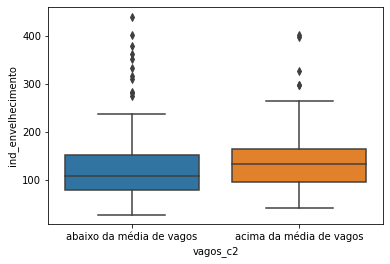

In [5]:
# Teste T para amostras independentes
sns.boxplot(data=df_BGRI_municipio, x='vagos_c2', y='ind_envelhecimento')

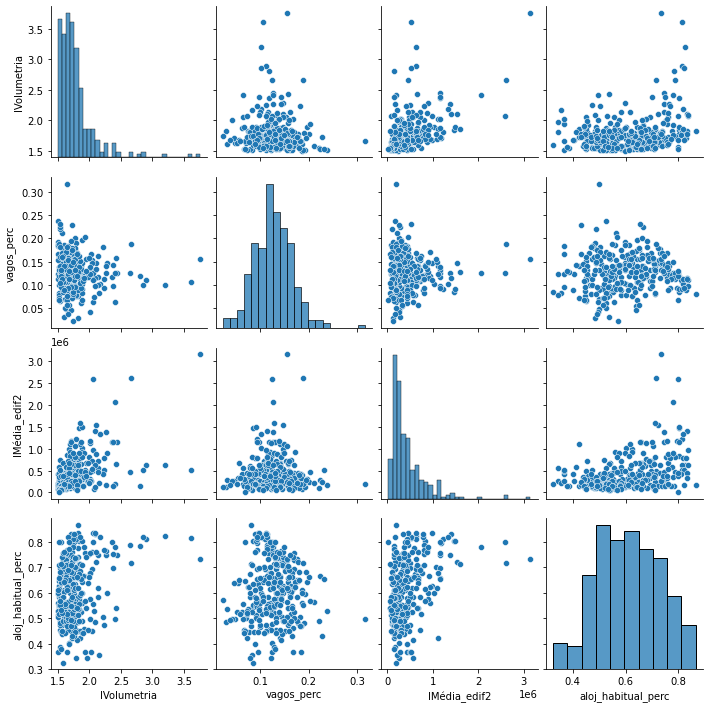

In [11]:
sns.pairplot(df_BGRI_municipio[['IVolumetria','vagos_perc','IMédia_edif2','aloj_habitual_perc']])